# With Background ttgg and signal Tprime

Here, The input files are Signal with Tprime and background file used here are ttgg. Both have been used with the same number of input varaibles.'dipho_pt','dipho_phi',      'dipho_eta','dipho_e','dipho_mass','dipho_leadPt',  'dipho_leadEt','dipho_leadEta','dipho_leadPhi',          'dipho_subleadEta','bjet1_pt','bjet2_pt','bjet1_eta',
 'bjet2_eta', 'jet1_pt','jet2_pt', 'jet1_eta',           'n_jets', 'n_bjets', 'bjet2_phi',  'bjet3_phi',           'bjet1_discr','bjet2_discr', 'bjet3_discr',        'jet3_pt', 'jet3_phi',  'jet1_e',  'jet2_e',         'jet3_e'.

    

In [1]:
import pandas as pd
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import adam
%matplotlib inline
import random
import pandas, numpy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
# this wrapper makes it possible to train on subset of features
import sklearn
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
# import xgboost as xgb
from itertools import tee, islice
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
from root_numpy import root2array, tree2array, array2tree, array2root
import sys
from ROOT import gROOT, AddressOf
from root_numpy import root2array, rec2array
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree

Using TensorFlow backend.


Welcome to JupyROOT 6.16/00


In [2]:
signal = '/afs/cern.ch/user/s/sraj/public/data_folder/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
back_3 = '/afs/cern.ch/user/s/sraj/public/data_folder/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'
treeName_back_3 ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_signal = "tagsDumper/trees/Tprime_600_13TeV_THQLeptonicTag"
columns = ['dipho_pt',
           'dipho_phi',
           'dipho_eta',
           'dipho_e',
           'dipho_mass',
           'dipho_leadPt',
           'dipho_leadEt',
           'dipho_leadEta',
           'dipho_leadPhi',
           'dipho_subleadEta',
           'bjet1_pt',
           'bjet2_pt',
           'bjet1_eta',
           'bjet2_eta',
           'jet1_pt',
           'jet2_pt',
           'jet1_eta',
           'n_jets',
           'n_bjets',
           'bjet2_phi',
           'bjet3_phi',
#            'bjet3_eta',
           'bjet1_discr',
           'bjet2_discr',
           'bjet3_discr',
           'jet3_pt',
#           'jet1_phi',
#          'jet2_phi' ,
          'jet3_phi',
          'jet1_e',
          'jet2_e',
          'jet3_e',
#            'CMS_hgg_mass',
#             'sigmaMoM_decorr',
#             'dipho_sumpt',
#             'dipho_cosphi',
# #             'dipho_mass',
#             'dipho_lead_ptoM',
#             'ele1_pt',
#             'ele2_pt',
#             'ele1_eta',
#             'ele2_eta',
#             'ele1_phi',
#             'ele2_phi',
#             'ele1_e',
#             'ele2_e',
#             'ele1_ch',
#             'ele2_ch',
          ]


#Data is converted to array
mc_arr = root2array(signal, treeName_signal, columns)
# data_arr_1 = root2array(back_1, treeName_back_1, columns)
# data_arr_2 = root2array(back_2, treeName_back_2, columns)
data_arr_3 = root2array(back_3, treeName_back_3, columns)

# data_arr= np.concatenate((data_arr_1, data_arr_2, data_arr_3),axis =0)

signal_array = rec2array(mc_arr)
backgr_array = rec2array(data_arr_3)


In [3]:
##you can convert in dataFrame or may be not. There will be no significant effect
# on the output as it is already in array form
signal = pd.DataFrame(signal_array)
backgr = pd.DataFrame(backgr_array)

Define X and y from the given files. It is defined to get array for further classification in spltting it into test and train parts


In [4]:
X = np.concatenate((signal, backgr))
Y = np.concatenate((np.ones(signal.shape[0]),
                    np.zeros(backgr.shape[0])))


With the help of sklearn module "from sklearn.model_selection import train_test_split
" divide the file into train and test parts. Here we have took the standard 33% for testing and rest 67% of the data for training. We can also split the datas further as wish into 50% training and 50% testing but there might be chances of undertraining or overfitting.

In [5]:
Xtrain,Xtest, Ytrain,Ytest = train_test_split(X, Y, test_size=0.33, random_state =40)

We can also divide the data into this way 

In [6]:
# r =numpy.random.rand(X.shape[0])
# # Get training and testing samples, splitting in half (using 0.5)
# Xtrain=X[r>0.5]
# Xtest=X[r<=0.5]   
# Ytrain=Y[r>0.5]
# Ytest=Y[r<=0.5] 
# # print(r[0:100])

Here importing the modeules for DNN training. we can also do another method of machine learning, we will get same output from each and every training. There might be differences in the training accuracy and loss of the model

In [7]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM



This is the model summary of the DNN, 

https://github.com/raj2022/M.Sc.-thesis/blob/main/Outputs/clf_plot____.png

In [8]:
#define model for training

clf = Sequential()
# clf.add(LSTM(1, return_sequences=True ))
clf.add(Dropout(3,input_shape = (29,)))
clf.add(Dense(200, activation = 'relu', kernel_initializer = 'lecun_uniform',name = 'dense_1'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform', name = 'dense_2'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform', name = 'dense_3'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform',name = 'dense_4'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform', name = 'dense_5'))
#Output
clf.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'lecun_uniform', name = 'output'))
#compile model
clf.compile(loss = 'binary_crossentropy', 
            optimizer='adam',
            metrics=['accuracy'])
print(clf.summary())
plot_model(clf, to_file='clf_plot____.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 29)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               6000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total para

In [9]:
h = clf.fit(Xtrain, Ytrain, epochs = 100, batch_size= 900, validation_split = 0.25)

Train on 68772 samples, validate on 22924 samples
Epoch 1/100
68772/68772 [==============================] - 2s 33us/step - loss: 2.1388 - acc: 0.7327 - val_loss: 0.3981 - val_acc: 0.8365
Epoch 2/100
68772/68772 [==============================] - 1s 15us/step - loss: 0.3847 - acc: 0.8414 - val_loss: 0.5513 - val_acc: 0.7951
Epoch 3/100
68772/68772 [==============================] - 1s 15us/step - loss: 0.3663 - acc: 0.8490 - val_loss: 0.3632 - val_acc: 0.8476
Epoch 4/100
68772/68772 [==============================] - 1s 16us/step - loss: 0.3502 - acc: 0.8549 - val_loss: 0.3500 - val_acc: 0.8515
Epoch 5/100
68772/68772 [==============================] - 1s 15us/step - loss: 0.3351 - acc: 0.8607 - val_loss: 0.3301 - val_acc: 0.8592
Epoch 6/100
68772/68772 [==============================] - 1s 19us/step - loss: 0.3242 - acc: 0.8654 - val_loss: 0.3324 - val_acc: 0.8596
Epoch 7/100
68772/68772 [==============================] - 1s 17us/step - loss: 0.3224 - acc: 0.8650 - val_loss: 0.3537 - 

68772/68772 [==============================] - 1s 17us/step - loss: 0.2074 - acc: 0.9171 - val_loss: 0.2403 - val_acc: 0.9036
Epoch 60/100
68772/68772 [==============================] - 1s 18us/step - loss: 0.1829 - acc: 0.9272 - val_loss: 0.2307 - val_acc: 0.9052
Epoch 61/100
68772/68772 [==============================] - 1s 17us/step - loss: 0.1845 - acc: 0.9265 - val_loss: 0.2119 - val_acc: 0.9128
Epoch 62/100
68772/68772 [==============================] - 1s 18us/step - loss: 0.1774 - acc: 0.9296 - val_loss: 0.2039 - val_acc: 0.9183
Epoch 63/100
68772/68772 [==============================] - 1s 18us/step - loss: 0.1780 - acc: 0.9305 - val_loss: 0.1994 - val_acc: 0.9193
Epoch 64/100
68772/68772 [==============================] - 1s 17us/step - loss: 0.2069 - acc: 0.9169 - val_loss: 0.2181 - val_acc: 0.9131
Epoch 65/100
68772/68772 [==============================] - 1s 19us/step - loss: 0.1802 - acc: 0.9282 - val_loss: 0.2354 - val_acc: 0.9074
Epoch 66/100
68772/68772 [==============

2021-10-11 14:06:01.544700: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


In [10]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(Xtest, Ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 90.04%


In [11]:
# Final evaluation of the model for DNN
#training Outputs
scores = clf.evaluate(Xtrain, Ytrain, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 91.51%


Plotting the ROC curve 

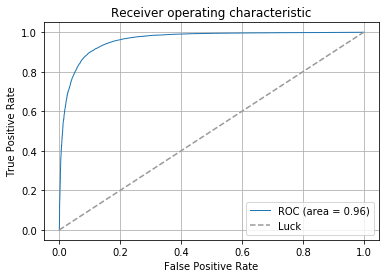

In [12]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict_proba(Xtest)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(Ytest, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

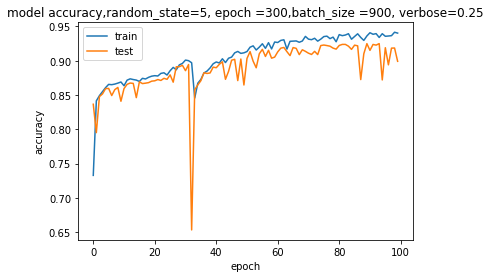

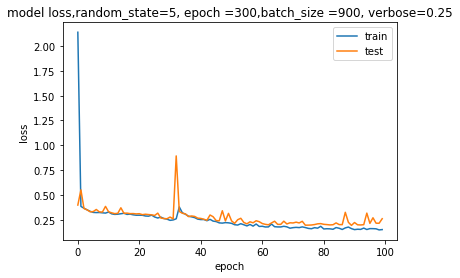

In [13]:
# summarize history for accuracy
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy,random_state=5, epoch =300,batch_size =900, verbose=0.25')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('model_accuracy_rndmstate_6.png')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss,random_state=5, epoch =300,batch_size =900, verbose=0.25')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('loss_rndmstate_6.png')
plt.show()

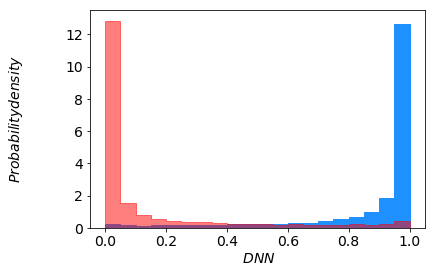

In [14]:
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict_proba(Xtest)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[Ytest==0]
tSig = tTest[Ytest==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=True, color ='dodgerblue' )
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=True,color = 'red' ,alpha=0.5)
# plt.savefig('output_TPrime_ttgg.png')
plt.show()